# Import Libraries

In [192]:
#libraries are imported
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy 
import sklearn 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [193]:
#Path is created
path = r'\Users\Ida\Desktop\Fashion Project\Data Source'

In [194]:
#Document is imported
df = pd.read_csv(os.path.join(path,'mock_fashion_data_uk_us.csv'))

In [195]:
df.head()

,Country,Product Name,Price,Brand,Category,Rating,Review Count,Style Attributes,Total Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,USA,T5D3,97.509966,Ralph Lauren,Footwear,1.421706,492,Streetwear,"M, L, XL",Green,Medium,24,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,France,Y0V7,52.341277,Ted Baker,Tops,1.037677,57,Vintage,"M, L, XL",Black,Above Average,61,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other
2,Italy,N9Q4,15.430975,Jigsaw,Footwear,3.967106,197,Streetwear,"S, M, L",Blue,Average,27,Marie Claire,Gigi Hadid,Summer,Nighttime,Unknown,Negative,Neutral
3,Sweden,V2T6,81.116542,Alexander McQueen,Outerwear,2.844659,473,Formal,"S, M, L",Red,Very High,50,Marie Claire,Chiara Ferragni,Fall/Winter,Weekend,Neutral,Other,Other
4,Turkey,S7Y1,31.633686,Tommy Hilfiger,Bottoms,1.183242,55,Sporty,"M, L, XL",Green,Above Average,23,Glamour,Song of Style,Spring,Daytime,Positive,Mixed,Positive


# Data Wrangling and Cleaning

In [176]:
#Check for duplicates
df_dups = df[df.duplicated()] 
df_dups

,Country,Product Name,Price,Brand,Category,Rating,Review Count,Style Attributes,Total Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback


In [177]:
#Check for null values
df.isnull().sum()


Country                         0
Product Name                    0
Price                           0
Brand                           0
Category                        0
Rating                          0
Review Count                    0
Style Attributes                0
Total Sizes                     0
Color                           0
Purchase History                0
Age                             0
Fashion Magazines               0
Fashion Influencers             0
Season                          0
Time Period Highest Purchase    0
Customer Reviews                0
Social Media Comments           0
feedback                        0
dtype: int64

In [178]:
# Turn into numerical data
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Review Count'] = pd.to_numeric(df['Review Count'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [179]:
# Check for mixed type 
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

In [196]:
#Create a list of columns
columns=['Price','Rating','Age','Country','Season']

In [197]:
#Created the df_set with those columns
df_set=df[columns]

In [198]:
#Aggregating values
agg = {'Rating':'first',
      'Age':'first','Price':'first'}

In [199]:
df_set = df_set.groupby(['Country']).agg(agg)

In [201]:
#Saving dataframe
df_set = pd.DataFrame(df_set_st.reset_index())

In [202]:
#Show dataframe
df_set.head()

,Price,Rating,Age
0,10.000145,3.395168,20
1,10.000231,1.480383,31
2,10.000257,3.933601,31
3,10.000297,3.333018,39
4,10.000319,2.493104,34


# The Elbow Technique

In [203]:
#define a range of potential numbers of cluster
num_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_clusters]

In [204]:
#apply k-means algorithm
score = [kmeans[i].fit(df_set).score(df_set) for i in range(len(kmeans))]


C:\Users\Ida\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ida\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ida\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ida\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

In [205]:
#score is listed
score

[-860312162.5948734,
 -354032341.1936082,
 -260323424.62997818,
 -204792868.491234,
 -158057335.67261124,
 -122270767.40800577,
 -103894752.73821971,
 -89479239.29422544,
 -81361187.61262226]

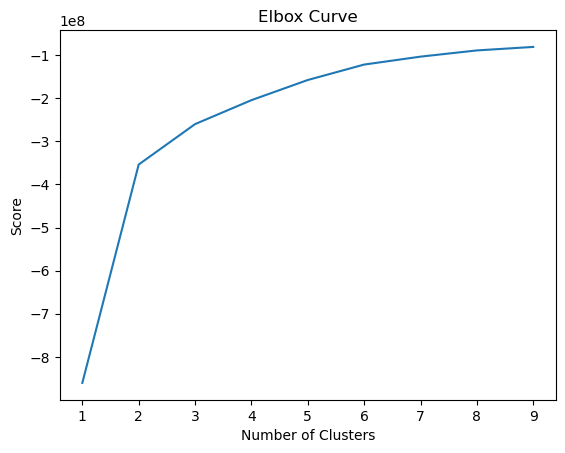

In [206]:
#the elbow curve plot 
pl.plot(num_clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbox Curve')
pl.show()

# Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.


I will choose 3 as an optimal count because values start to jump from 1 to 3 rapidly. Then plateaus after 3. 

 # The K-means Algorithm 

In [207]:
#the k-means object is created
kmeans = KMeans(n_clusters = 3)

In [208]:
# kmeans object fitted to dataframe 
kmeans.fit(df_set)

C:\Users\Ida\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

 # Attach a new column to your dataframe with the resulting clusters

In [209]:
#create column in dataframe 
df_set['clusters'] = kmeans.fit_predict(df_set)

C:\Users\Ida\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [210]:
#check the frame
df_set.head()

,Price,Rating,Age,clusters
0,10.000145,3.395168,20,0
1,10.000231,1.480383,31,0
2,10.000257,3.933601,31,0
3,10.000297,3.333018,39,0
4,10.000319,2.493104,34,0


In [211]:
#count clusters
df_set['clusters'].value_counts()

clusters
1    334205
2    333057
0    332738
Name: count, dtype: int64

#  Create a few different visualizations (e.g., scatterplots) using your clustered data. 

C:\Users\Ida\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


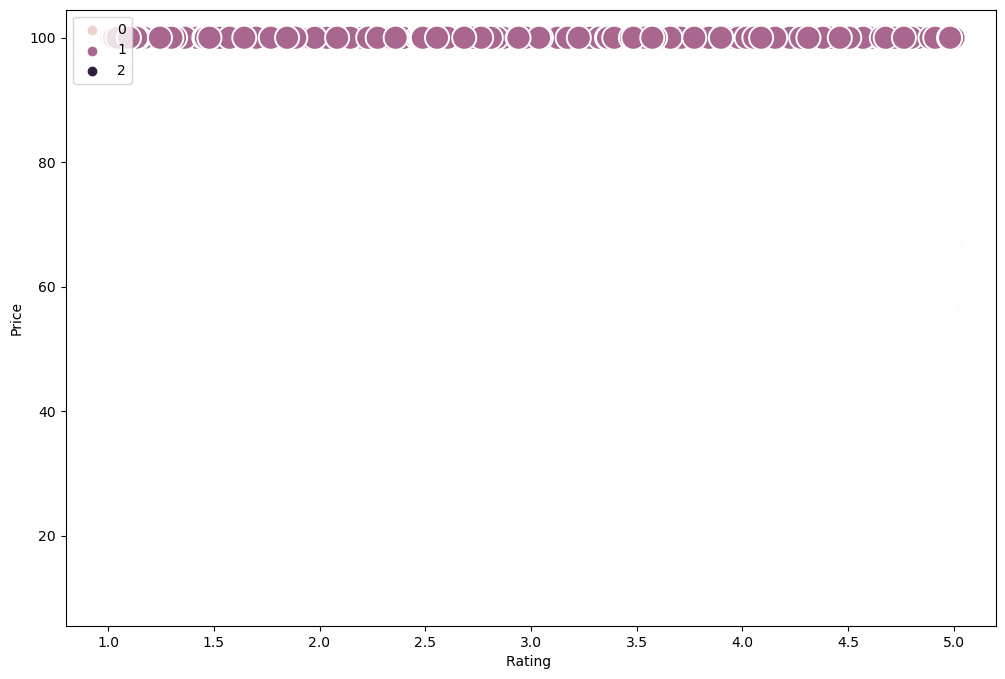

In [213]:
# plot rating vs price
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_set['Rating'], y=df_set['Price'], hue=kmeans.labels_, s=300) 

ax.grid(False) 
plt.xlabel('Rating ') 
plt.ylabel('Price') 
plt.show()

C:\Users\Ida\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


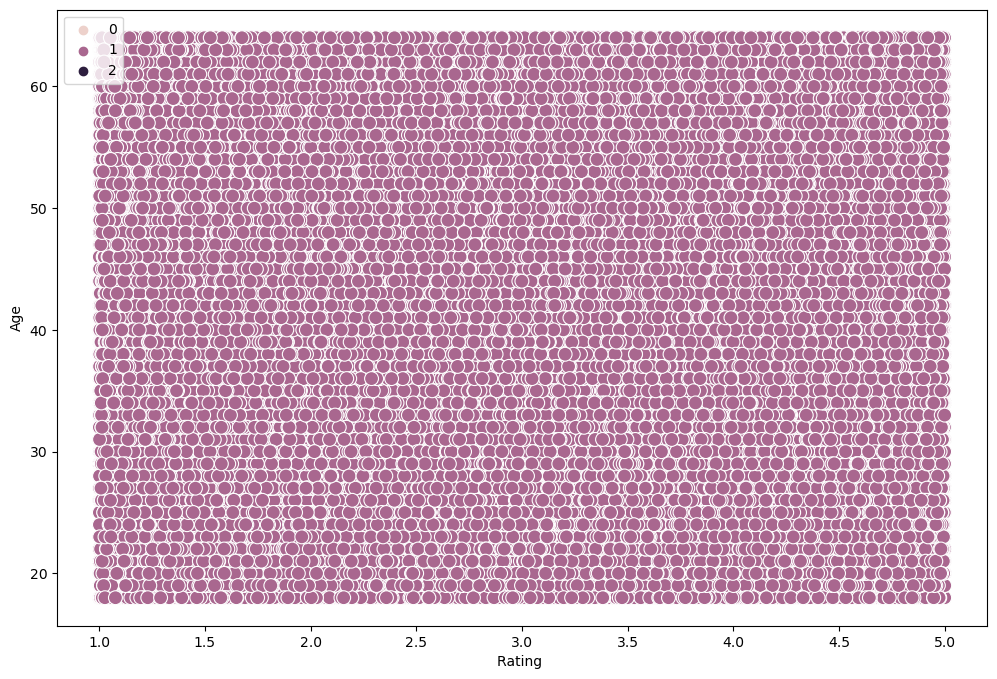

In [214]:
# plot rating vs age
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_set['Rating'], y=df_set['Age'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Rating ') 
plt.ylabel('Age') 
plt.show()

# Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

They do not make any sense and there is no correlation between any variables. It does need another type of analysis because variables that are string is more affective on price and rating. 

# Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [215]:
#a column turns clusters to colors is created
df_set.loc[df_set['clusters'] == 2, 'cluster'] = 'black'
df_set.loc[df_set['clusters'] == 1, 'cluster'] = 'dark gray'
df_set.loc[df_set['clusters'] == 0, 'cluster'] = 'gray'

In [216]:
df_set.groupby('cluster').agg({
    'Age':['mean','median'],
    'Price':['mean','median'],
    'Rating':['mean','median']})

Age             Price               Rating          
                mean median       mean     median      mean    median
cluster                                                              
black      40.900170   41.0  54.946217  54.943669  2.997234  2.994011
dark gray  41.059673   41.0  84.956545  84.958682  2.999431  2.997820
gray       41.052585   41.0  24.969506  24.979592  2.998695  2.996657

# 10. Propose what these results could be useful for in future steps of an analytics pipeline.


It can be interesting to analyse this data set based on string data type values. 